### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
• Date - The date of the observation
• AveragePrice - the average price of a single avocado
• type - conventional or organic
• year - the year
• Region - the city or region of the observation
• Total Volume - Total number of avocados sold
• 4046 - Total number of avocados with PLU 4046 sold
• 4225 - Total number of avocados with PLU 4225 sold
• 4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\rober\Desktop\Data science course\Evaluation phase projects\FirstPhase\avocado.csv\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [5]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\nThe columns headers in the dataset: {df.columns}')

The rows and columns in the dataset:(18249, 14)

The columns headers in the dataset: Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


We can see that we don't have any null values in our dataset. We got all types of data, int, float and objects. Further I will drop unnamed: 0 column and I will transform the Date column and get it as index. 

In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
# Converting the datatype of Date Column from object to datetime
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [8]:
# checking Duplicate values in DataFrame

print('Total Duplicate rows are ', df.duplicated().sum())

Total Duplicate rows are  0


In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
Mean and 50% value of most of the column are same and the STD and mean are very close to each other.
By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

### Data Visualization:

<Axes: xlabel='year', ylabel='AveragePrice'>

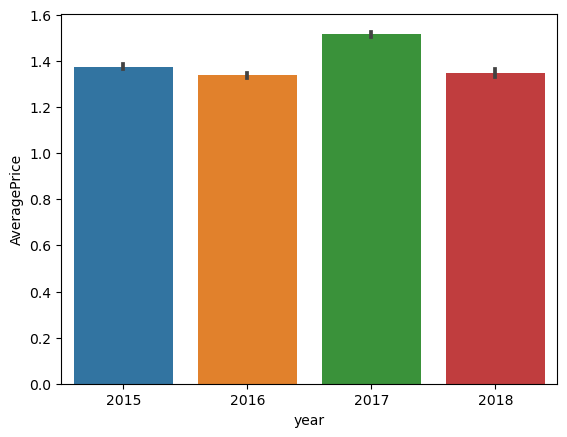

In [10]:
# I will check how the avarage price went along the yers 

sns.barplot(x='year', y='AveragePrice', data = df)

we can see that 2017 have the highest price. Let's the main range for avarage price. 

<Axes: xlabel='AveragePrice'>

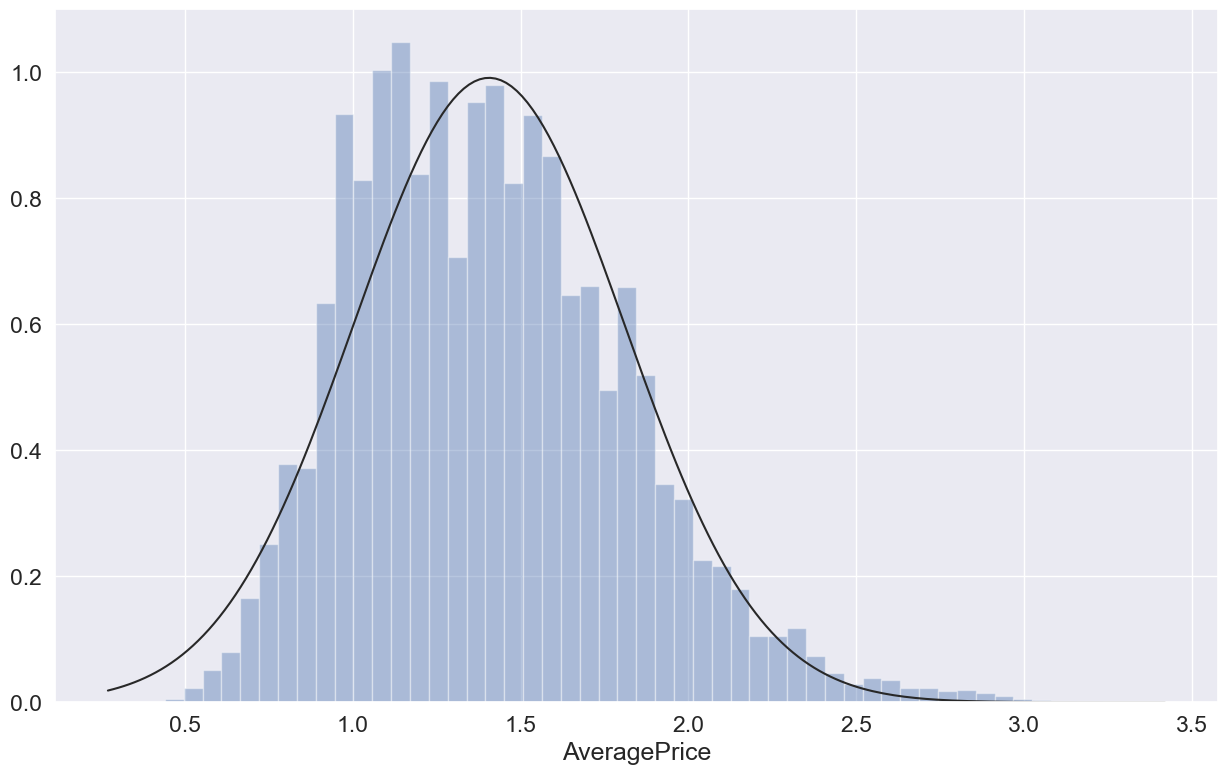

In [11]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

The data is between 1.0 and 1.4. So for 2017 which is close to 1.6 is a big difference. 

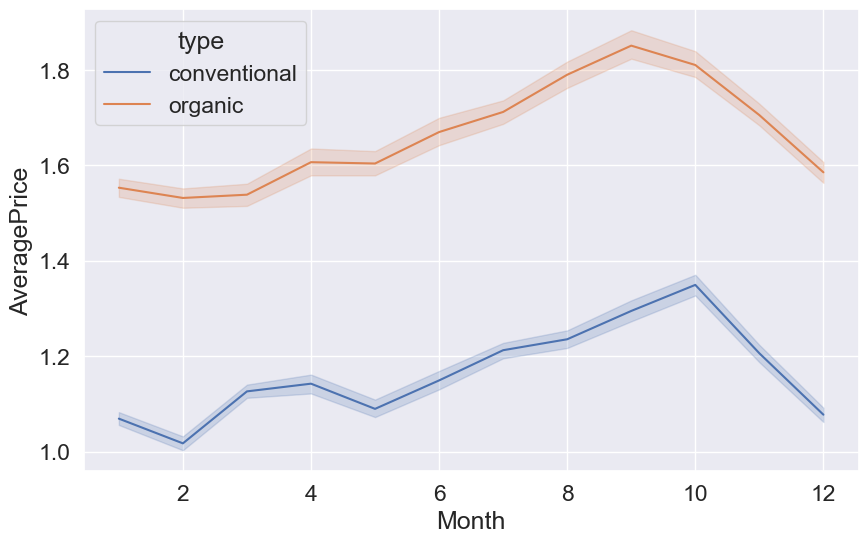

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Winter months have the highest price wich is normal, also, as expected, the organic avocado have a price a lot higher than the convetional one. 

<Figure size 1000x600 with 0 Axes>

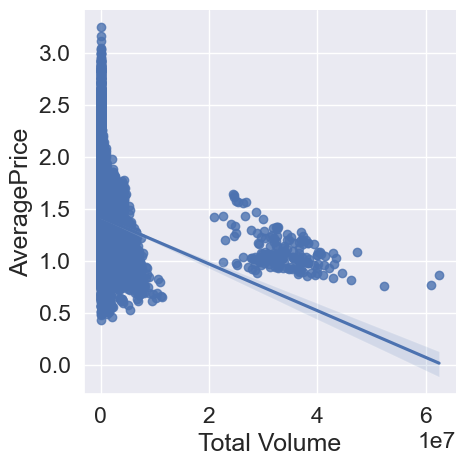

In [13]:
plt.figure(figsize=(10,6))
sns.lmplot(x="Total Volume", y="AveragePrice", data=df)
plt.show()

No correlation between price and volume. My logic didn't applied here. Let's see another correlation and if the result is the some we go further. 

<Figure size 1000x600 with 0 Axes>

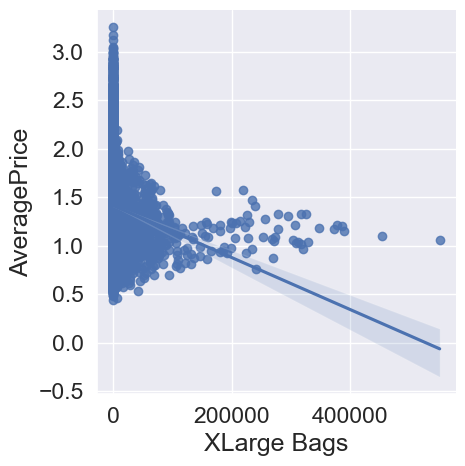

In [14]:
plt.figure(figsize=(10,6))
sns.lmplot(x="XLarge Bags", y="AveragePrice", data=df)
plt.show()

Here we can see a small correlation but can't tell to much. I'll go for a heatmap representation to see some numbers as well. But first I will solve the problems for outliers and skeweeness. 

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

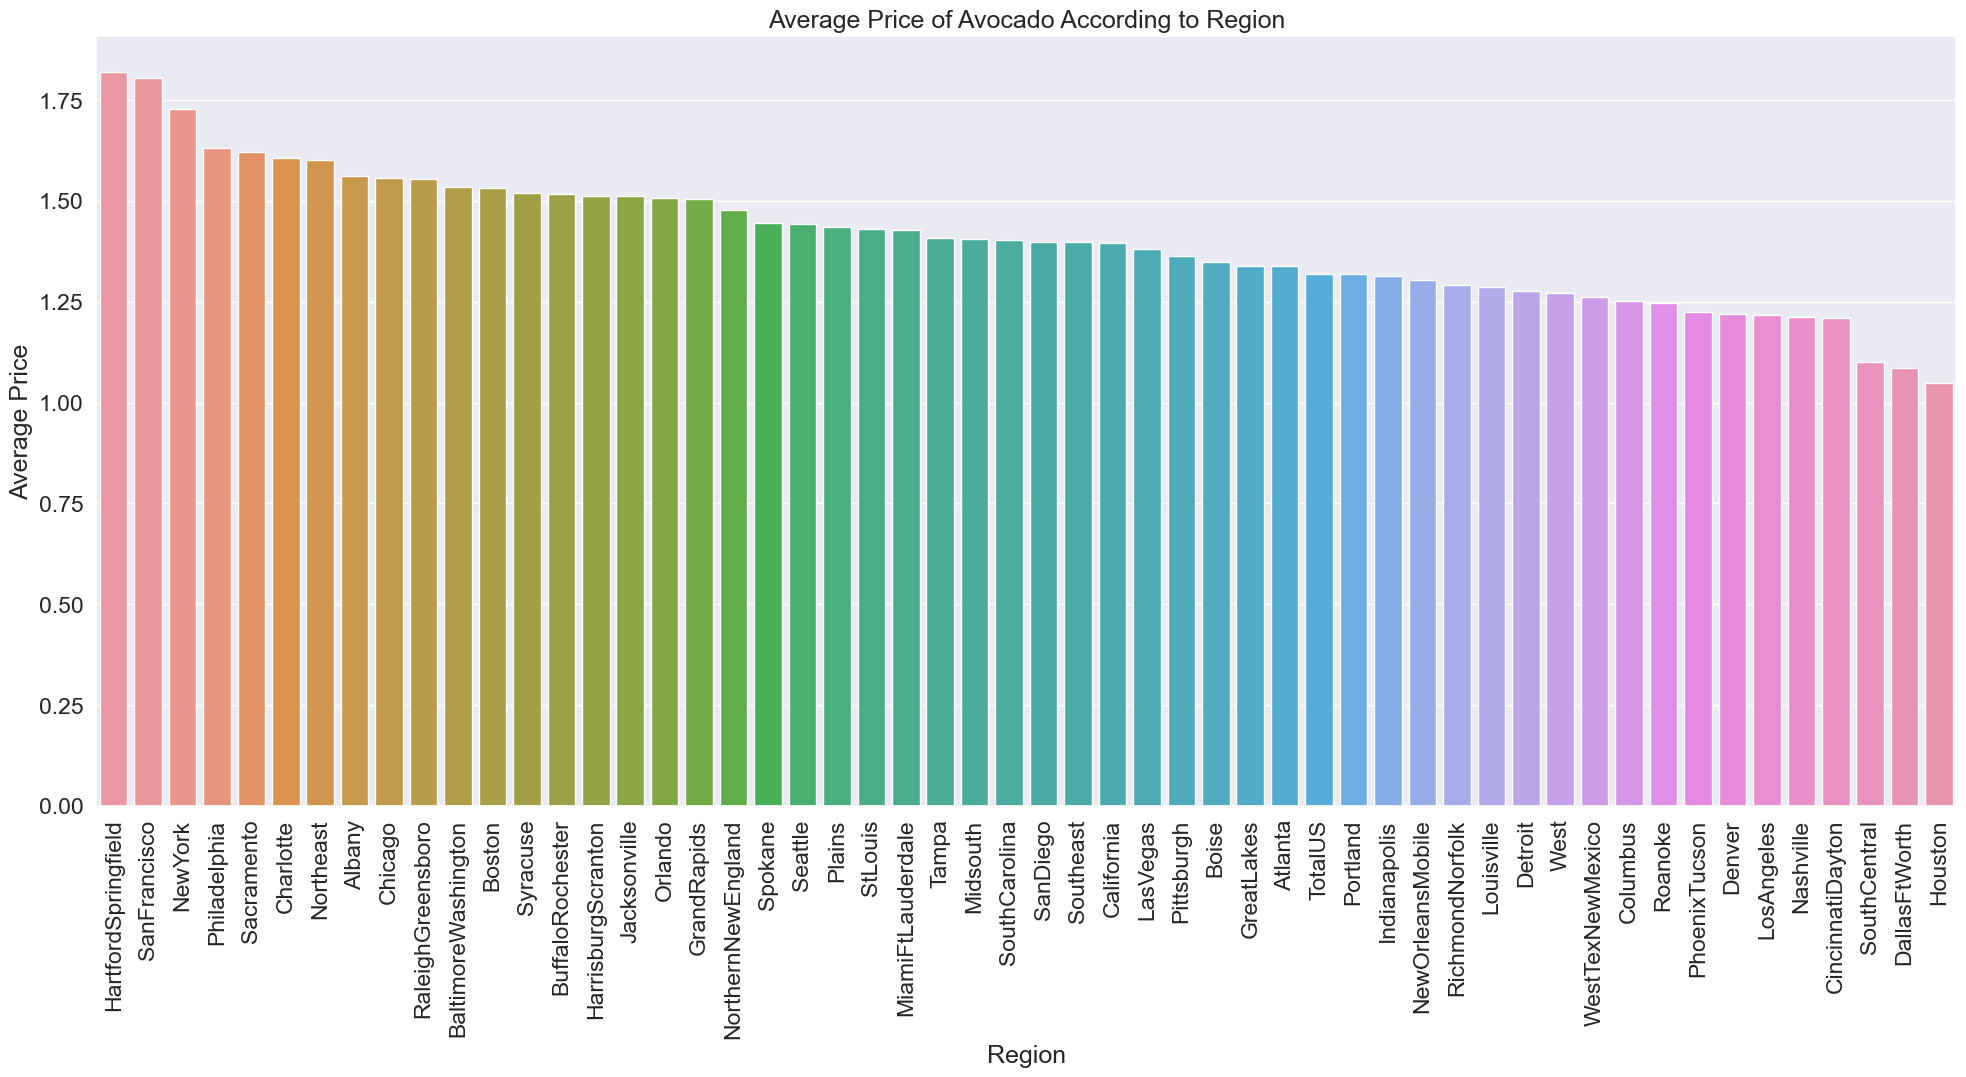

In [15]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

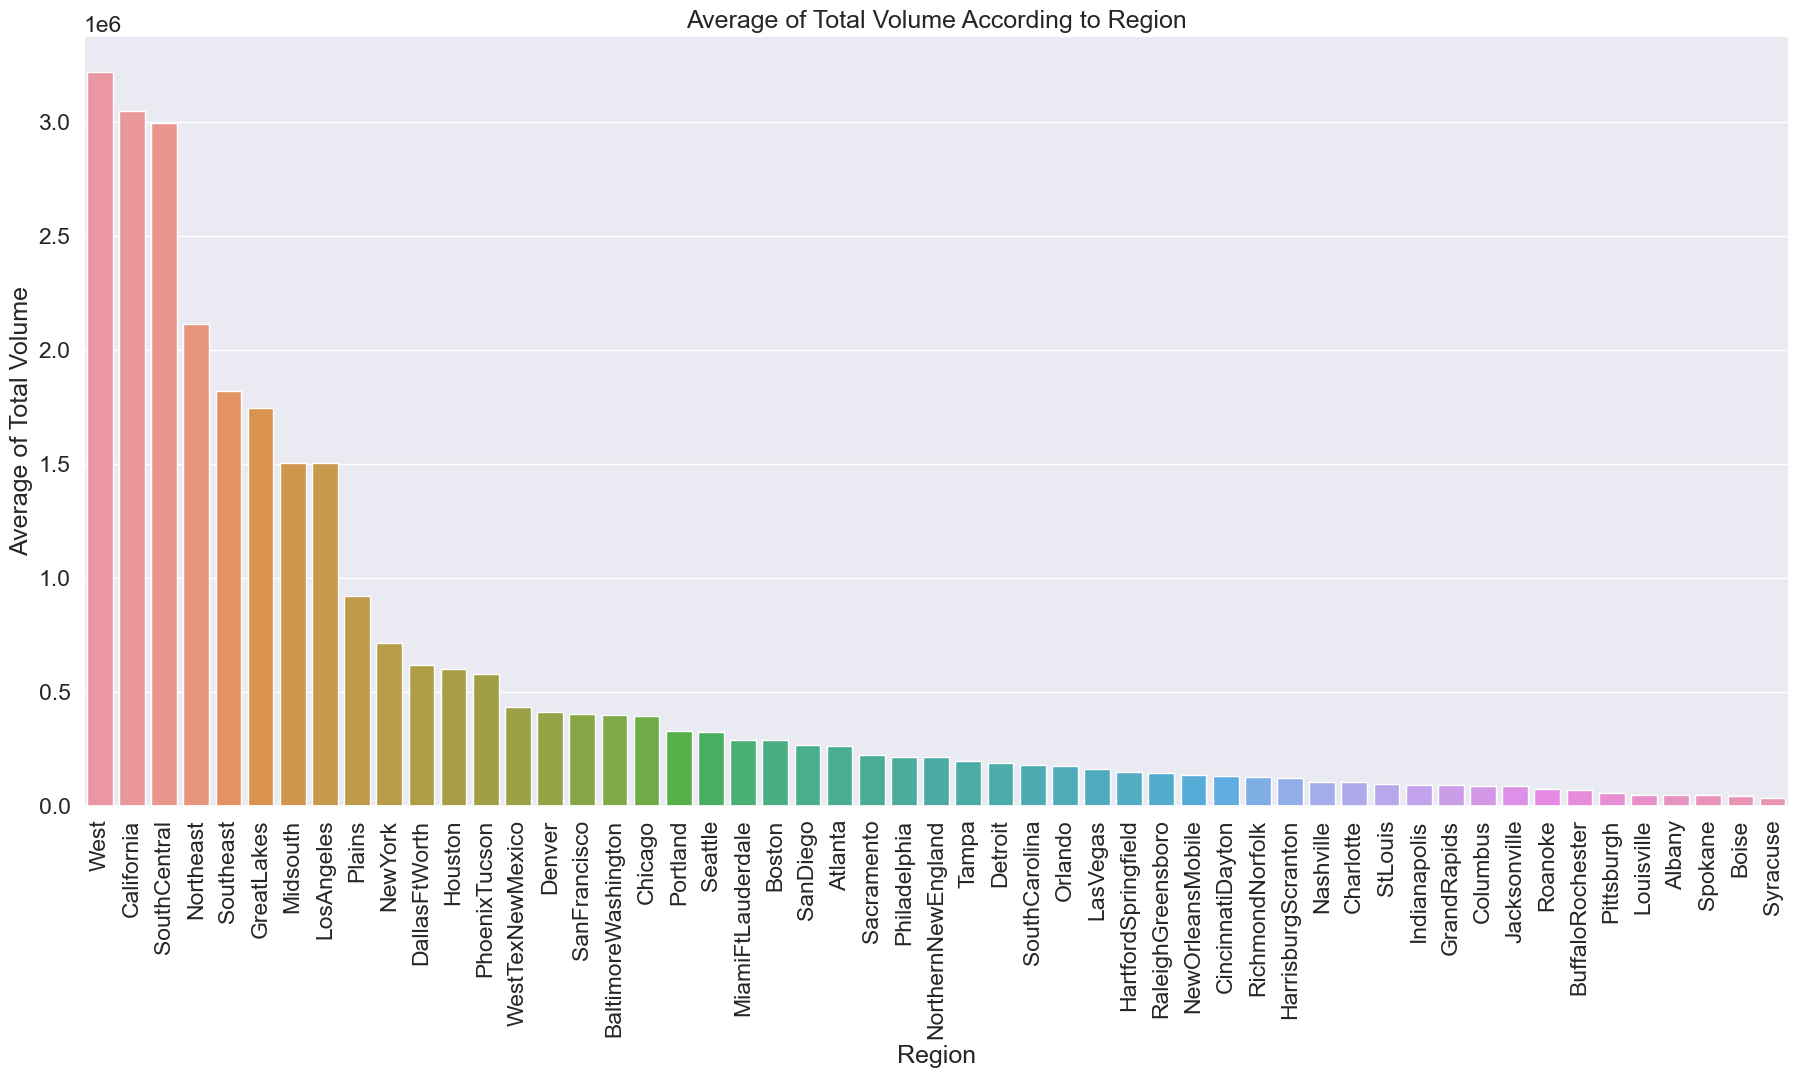

In [16]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

In [17]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,14


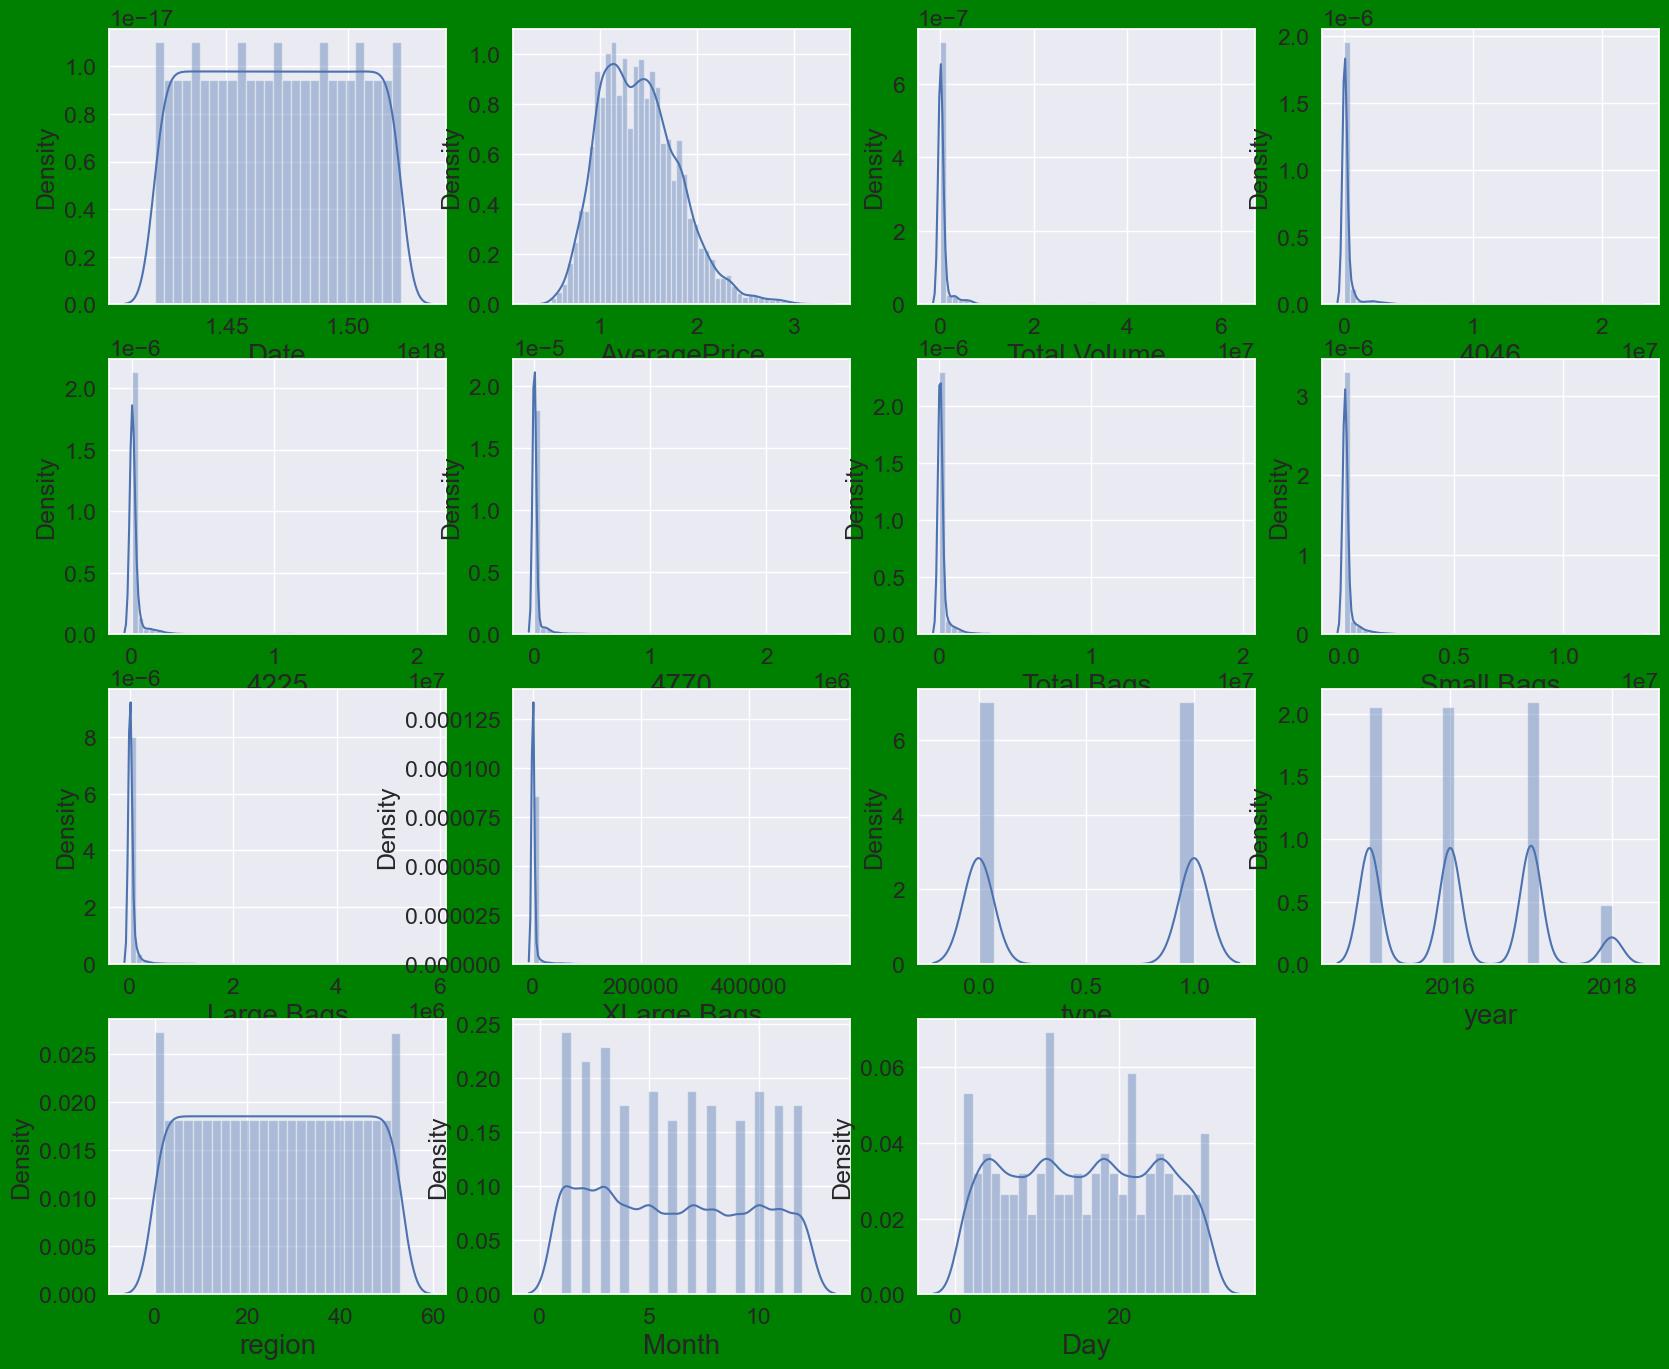

In [18]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

We don't have to pay attention to columns that were categorical or that  represent the date. We can see that the data is skeweed to the left in most of the columns that have continous data. 

In [19]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [20]:
skew = ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i] = np.log1p(df[i])

In [21]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
type            Axes(0.766379,0.511739;0.133621x0.167391)
year                Axes(0.125,0.31087;0.133621x0.167391)
region           Axes(0.285345,0.31087;0.133621x0.167391)
Month             Axes(0.44569,0.31087;0.133621x0.167391)
Day              Axes(0.606034,0.31087;0.133621x0.167391)
dtype: object

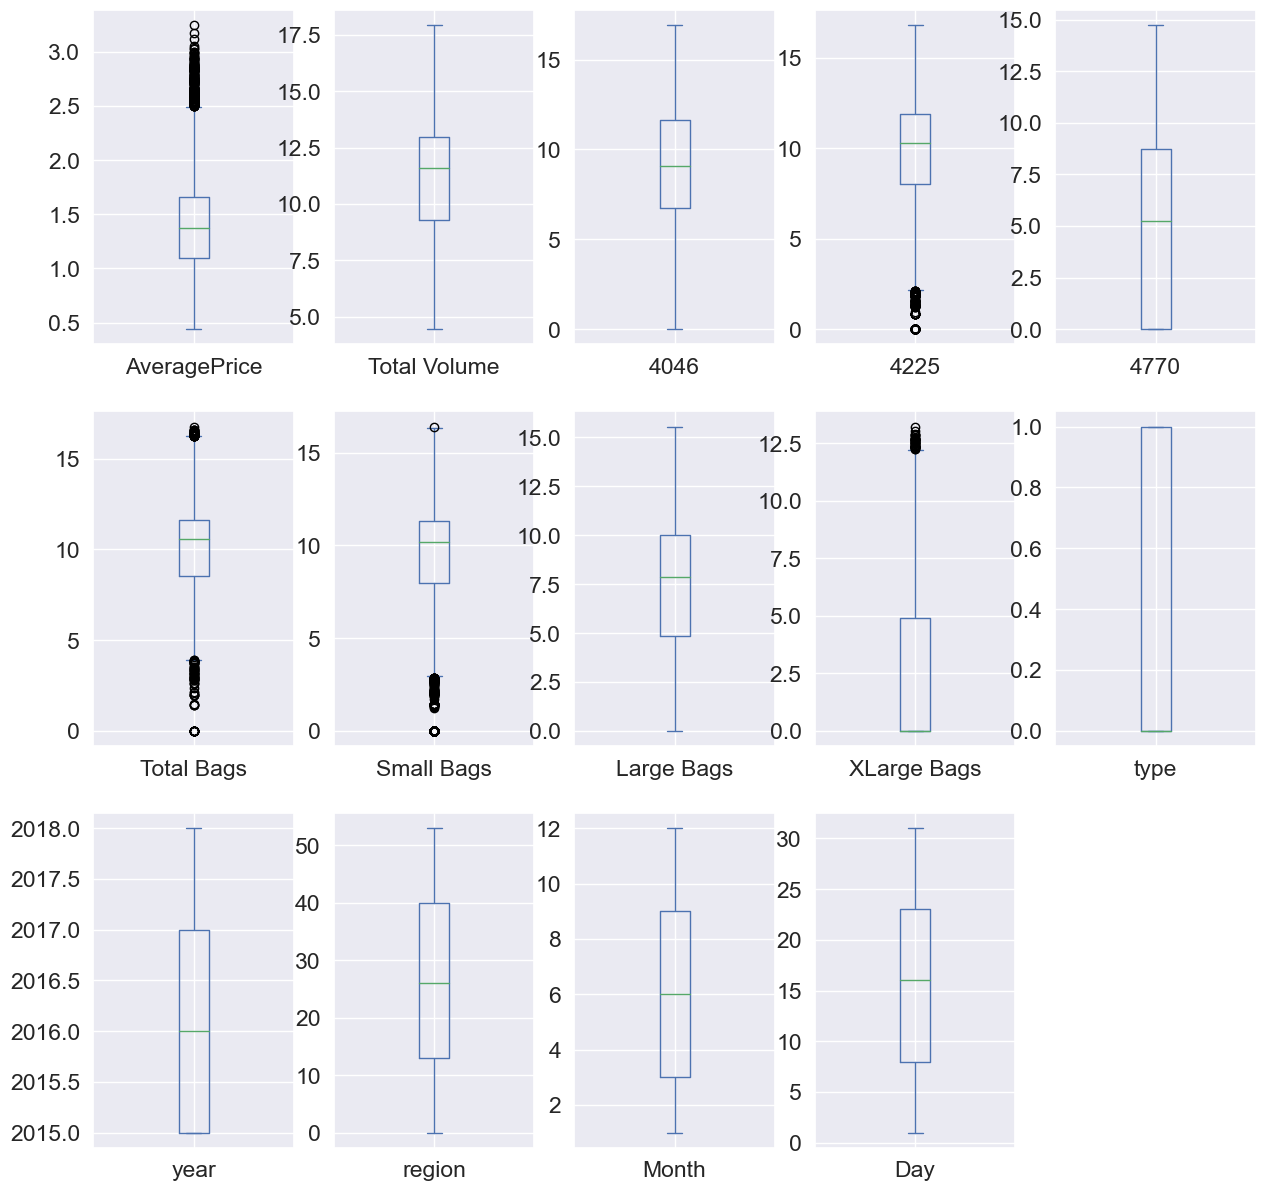

In [22]:
# I check outliers using boxplot
df.plot(kind='box', subplots = True, layout = (4,5), figsize = (15,20))

In [23]:
from scipy.stats import zscore # the thrshold value is -3 to +3
out_features = df[['Total Bags','Small Bags','XLarge Bags','4225']] # we dont put the target variable here. 
z=np.abs(zscore(out_features)) # abs is the absolute matter. It transform any neagtive value into positive. 
z

,Total Bags,Small Bags,XLarge Bags,4225
0,0.494074,0.247796,0.645526,0.374936
1,0.454761,0.213093,0.645526,0.305200
2,0.523041,0.273995,0.645526,0.618892
3,0.672335,0.409182,0.645526,0.472808
4,0.644845,0.388616,0.645526,0.298852
...,...,...,...,...
18244,0.299689,0.085548,0.645526,0.878279
18245,0.466102,0.232904,0.645526,0.594835
18246,0.459975,0.215422,0.645526,0.712597
18247,0.391424,0.155249,0.645526,0.644192


In [24]:
# now removing the data above zscore and creating new df. 
df = df[(z<3).all(axis=1)]

df.shape 

(17954, 15)

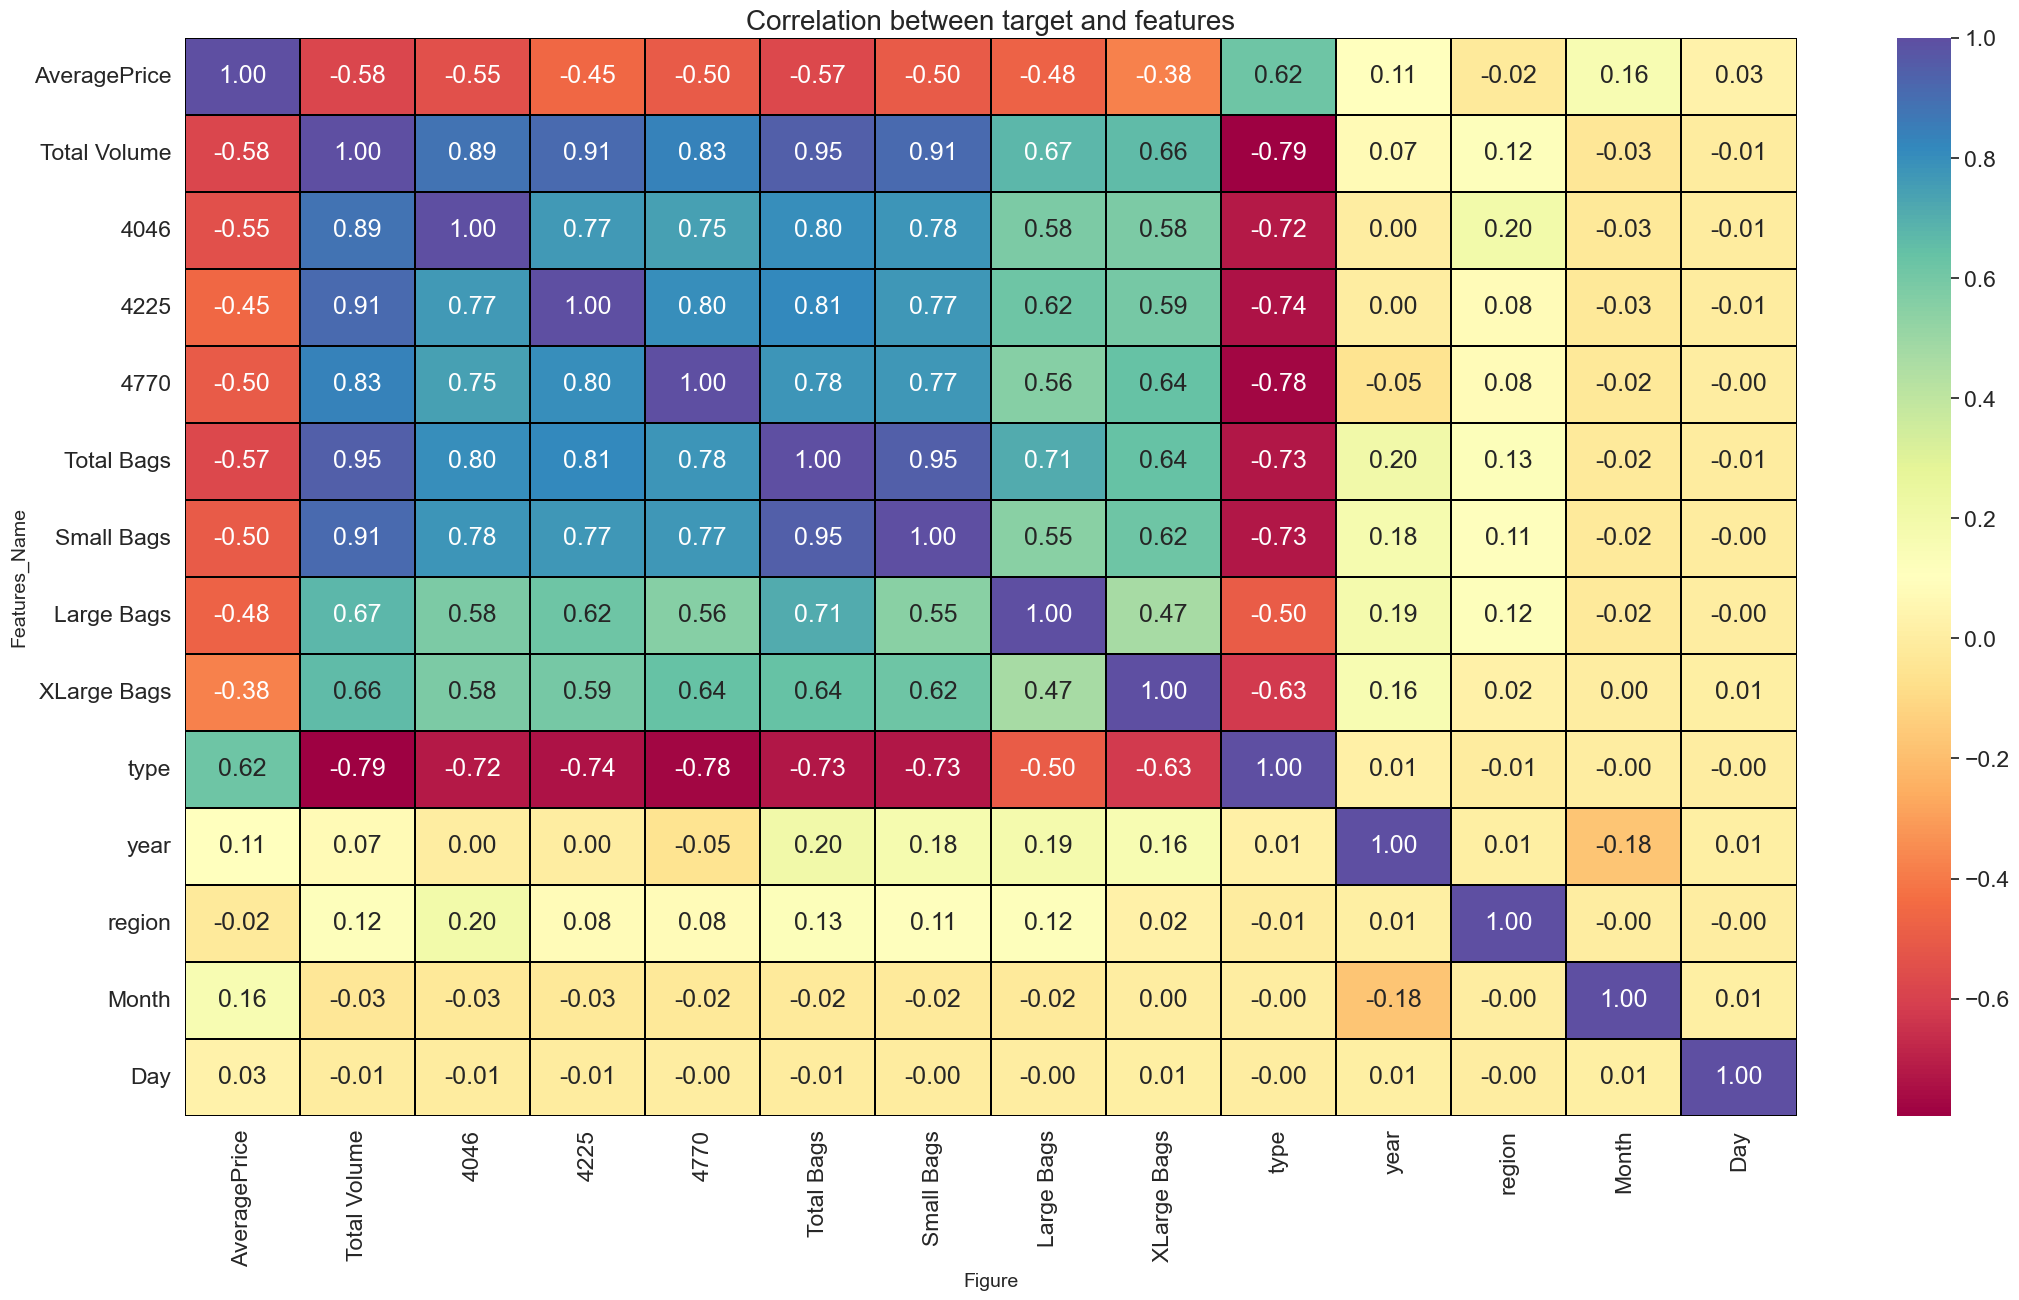

In [25]:
plt.figure(figsize = (26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', lw = 0.1, linecolor = 'black', cmap='Spectral')
plt.xlabel('Figure', fontsize = 14)
plt.ylabel('Features_Name', fontsize = 14)
plt.title ('Correlation between target and features', fontsize = 20)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

### Model building for AvaragePrice prediction

In [28]:
df.drop('Date', axis = 1, inplace = True)

In [32]:
x = df.drop('AveragePrice', axis = 1)
y = df['AveragePrice']
print(x.shape)
print(y.shape)

(17954, 13)
(17954,)


In [36]:
model = [DecisionTreeRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]
max_r2_score = 0 
for r_state in range (40,50):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state, test_size = 0.30)
    for i in model:
        i.fit(train_x,train_y)
        pred = i.predict(test_x)
        r2_sc = r2_score(test_y,pred)
        print("R2 score correspond to random_state", r_state, 'is', r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
print()
print()
print()
print('max R2 score correspond to random state', final_state, 'is',max_r2_score,'and model is', final_model)


R2 score correspond to random_state 40 is 0.7519523908829845
R2 score correspond to random_state 40 is 0.6278514004672766
R2 score correspond to random_state 40 is 0.7403427754511471
R2 score correspond to random_state 40 is 0.8833928494512947
R2 score correspond to random_state 41 is 0.7346133410979587
R2 score correspond to random_state 41 is 0.6389121565167231
R2 score correspond to random_state 41 is 0.750818100043368
R2 score correspond to random_state 41 is 0.8893110525439222
R2 score correspond to random_state 42 is 0.7600028776997357
R2 score correspond to random_state 42 is 0.6495864872225677
R2 score correspond to random_state 42 is 0.7547644038763891
R2 score correspond to random_state 42 is 0.8905571087240803
R2 score correspond to random_state 43 is 0.7369366883728214
R2 score correspond to random_state 43 is 0.6437055884123284
R2 score correspond to random_state 43 is 0.7591802341018743
R2 score correspond to random_state 43 is 0.8874898357009118
R2 score correspond to ra

In [38]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':[50, 100, 120], 
         'criterion':['squared_error', 'friedman_mse'],
        'max_features':['sqrt','log2'],
        'bootstrap':[False,True],
        'random_state':[10, 11, 100, 120]}

gscv = GridSearchCV(RandomForestRegressor(),param, cv=5)
gscv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['squared_error', 'friedman_mse'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 120],
                         'random_state': [10, 11, 100, 120]})

In [39]:
gscv.best_params_

{'bootstrap': False,
 'criterion': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 120,
 'random_state': 120}

In [40]:
Model = RandomForestRegressor(n_estimators = 120, criterion = 'squared_error', max_features = 'sqrt', random_state= 120, bootstrap = False)

In [42]:
Model.fit(train_x, train_y)
pred=Model.predict(test_x)
print('R2_score:', r2_score(test_y,pred))
print('Mean Absolute Error:', mean_absolute_error(test_y, pred))
print('Mean Squared Error:', mean_squared_error(test_y, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, pred)))

R2_score: 0.8956635815114862
Mean Absolute Error: 0.08944833240517296
Mean Squared Error: 0.01651135807396407
Root Mean Squared Error: 0.12849652942381


In [43]:
import joblib
joblib.dump(Model, 'Avocado_project_AveragePrice_pred.pkl')

['Avocado_project_AveragePrice_pred.pkl']

Text(0, 0.5, 'predicted_Y')

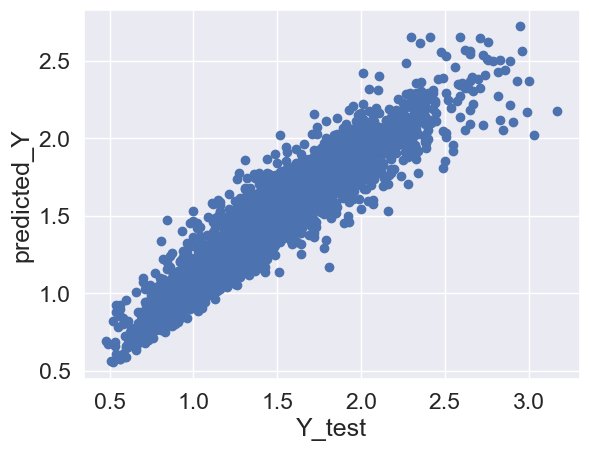

In [45]:
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_test')
plt.ylabel('predicted_Y')

In [47]:
# lets load the saved model and get the predictions
model = joblib.load('Avocado_project_AveragePrice_pred.pkl')

# prediction
prediction = model.predict(test_x)
prediction

array([1.13808333, 1.03825   , 1.2615    , ..., 1.22116667, 1.37116667,
       2.19675   ])

In [48]:
a = np.array(test_y) # this is to convert y_test intro array
df_ap = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df_ap

,Predicted,Orignial
0,1.138083,1.13
1,1.038250,1.10
2,1.261500,1.13
3,1.229917,1.30
4,1.118333,1.11
...,...,...
5382,1.257667,1.26
5383,2.002750,2.22
5384,1.221167,1.05
5385,1.371167,1.36


In [49]:
conclusion = pd.DataFrame([model.predict(test_x)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386
Predicted,1.138083,1.03825,1.2615,1.229917,1.118333,1.301417,1.188833,0.986417,1.067667,1.492917,...,1.016,1.713333,1.096833,1.657083,1.110833,1.257667,2.00275,1.221167,1.371167,2.19675
Original,1.138083,1.03825,1.2615,1.229917,1.118333,1.301417,1.188833,0.986417,1.067667,1.492917,...,1.016,1.713333,1.096833,1.657083,1.110833,1.257667,2.00275,1.221167,1.371167,2.19675


### Model Building for Region prediction 

In [29]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0.0,2015,0.0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0.0,2015,0.0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0.0,2015,0.0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0.0,2015,0.0,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1.0,2018,53.0,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1.0,2018,53.0,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1.0,2018,53.0,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1.0,2018,53.0,1,14


In [30]:
x_r = df.drop('region', axis =1)
y_r = df['region'] 
print(x_r.shape)
print(y_r.shape)

(17954, 13)
(17954,)


In [31]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x_r,y_r, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.9183218860219046 at random_State 96


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_r,y_r, test_size = 0.30, random_state = maxRS)

In [34]:
# Checking accuracy for RandomForestClasifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9162799331724522
[[ 97   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   2  88   0]
 [  0   0   1 ...   0   0  82]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       100
         1.0       0.90      0.90      0.90        89
         2.0       0.98      1.00      0.99       100
         3.0       0.87      0.90      0.89        92
         4.0       0.99      0.98      0.99       106
         5.0       0.91      0.84      0.87       100
         6.0       0.98      0.96      0.97       112
         7.0       0.94      0.95      0.94       115
         8.0       0.94      0.96      0.95        99
         9.0       0.90      0.88      0.89       106
        10.0       0.86      0.87      0.87       103
        11.0       0.91      0.95      0.93       100
        12.0       0.96      0.94      0.95       110
        13.0       0.88      0.8

In [35]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.016335622795619082
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.00      0.00      0.00        89
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        92
         4.0       0.00      0.00      0.00       106
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       112
         7.0       0.00      0.00      0.00       115
         8.0       0.00      0.00      0.00        99
         9.0       0.00      0.00      0.00       106
        10.0       0.00      0.00      0.00       103
        11.0       0.00      0.00      0.00       100
        12.0       0.00      0.00      0.00       110
        13.0       0.00      0.00      0.00       105
        14.0       0.00      0.00      0.00     

In [36]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.8639316873955819
[[ 94   0   0 ...   0   0   0]
 [  0  74   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   1   0 ...   1  82   0]
 [  0   1   0 ...   0   0  70]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       100
         1.0       0.75      0.83      0.79        89
         2.0       0.91      1.00      0.95       100
         3.0       0.82      0.88      0.85        92
         4.0       0.94      0.92      0.93       106
         5.0       0.85      0.80      0.82       100
         6.0       0.94      0.96      0.95       112
         7.0       0.90      0.90      0.90       115
         8.0       0.94      0.93      0.93        99
         9.0       0.90      0.88      0.89       106
        10.0       0.80      0.82      0.81       103
        11.0       0.85      0.92      0.88       100
        12.0       0.91      0.86      0.89       110
        13.0       0.85      0.7

In [37]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9298310748097272
[[ 98   0   0 ...   0   0   0]
 [  0  82   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   2  88   0]
 [  0   0   1 ...   0   0  79]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       100
         1.0       0.88      0.92      0.90        89
         2.0       0.97      1.00      0.99       100
         3.0       0.89      0.92      0.90        92
         4.0       0.98      0.98      0.98       106
         5.0       0.97      0.86      0.91       100
         6.0       0.98      0.99      0.99       112
         7.0       0.94      0.97      0.96       115
         8.0       0.97      0.96      0.96        99
         9.0       0.88      0.91      0.89       106
        10.0       0.92      0.89      0.91       103
        11.0       0.98      0.97      0.97       100
        12.0       0.95      0.95      0.95       110
        13.0       0.88      0.8

In [38]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.05179134954520141
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.00      0.00      0.00        89
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        92
         4.0       0.16      0.09      0.12       106
         5.0       0.00      0.00      0.00       100
         6.0       0.00      0.00      0.00       112
         7.0       0.00      0.00      0.00       115
         8.0       0.06      0.47      0.11        99
         9.0       0.00      0.00      0.00       106
        10.0       0.00      0.00      0.00       103
        11.0       0.00      0.00      0.00       100
        12.0       0.00      0.00      0.00       110
        13.0       0.00      0.00      0.00       105
        14.0 

In [39]:
# Checking cv score for RFC
score = cross_val_score(RFC, x_r, y_r)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.63269284 0.81425787 0.75995544 0.68226121 0.4810585 ]
0.67404517173466
Difference between Accuracy score and cross validation score is - 0.2422347614377921


In [40]:
# Checking cv score for SVC
score = cross_val_score(svc, x_r, y_r)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predsvc) - score.mean())

[0.03397382 0.03202451 0.02450571 0.03007519 0.045961  ]
0.03330804572557981
Difference between Accuracy score and cross validation score is - -0.01697242292996073


In [41]:
# Checking cv score for BC
score = cross_val_score(BC, x_r, y_r)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predBC) - score.mean())

[0.54163186 0.74018379 0.70815929 0.61431356 0.44707521]
0.610272741587798
Difference between Accuracy score and cross validation score is - 0.2536589458077839


In [42]:
# Checking cv score for ET
score = cross_val_score(ET, x_r, y_r)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predET) - score.mean())

[0.68226121 0.80367586 0.76385408 0.6833751  0.50445682]
0.6875246146936516
Difference between Accuracy score and cross validation score is - 0.2423064601160756


In [43]:
# Checking cv score for ABC
score = cross_val_score(ABC, x_r, y_r)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predABC) - score.mean())

[0.03731551 0.05653021 0.07964355 0.05485937 0.04038997]
0.05374772430922555
Difference between Accuracy score and cross validation score is - -0.0019563747640241394


In [44]:
# ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [10,20,30],
              'random_state':[10, 50, 100],
              'n_jobs':[-2,-1,1],
              'n_estimators':[10, 15,20,50]}
GCV= GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 15, 20, 50],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [45]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [46]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 30, n_estimators = 50 , n_jobs = -2, random_state = 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

92.63040653424912


In [51]:
import joblib
joblib.dump(Final_model, 'Avocado_project_region.pkl')

['Avocado_project_region.pkl']

In [52]:
# lets load the saved model and get the predictions
model = joblib.load('Avocado_project_region.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([29., 14.,  9., ..., 23., 48., 41.])

In [53]:
a = np.array(y_test) # this is to convert y_test intro array
df_r = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df_r

,Predicted,Orignial
0,29.0,29.0
1,14.0,14.0
2,9.0,9.0
3,51.0,51.0
4,27.0,27.0
...,...,...
5382,27.0,27.0
5383,42.0,42.0
5384,23.0,23.0
5385,48.0,48.0


In [54]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386
Predicted,29.0,14.0,9.0,51.0,27.0,23.0,15.0,37.0,10.0,23.0,...,11.0,50.0,24.0,26.0,9.0,27.0,42.0,23.0,48.0,41.0
Original,29.0,14.0,9.0,51.0,27.0,23.0,15.0,37.0,10.0,23.0,...,11.0,50.0,24.0,26.0,9.0,27.0,42.0,23.0,48.0,41.0
